# Students' Examination Performance Data - Communicate Findings
## by Dorothy Kambua Thomas


## Investigation Overview

> I aimed to analyze the students' overall score and the factors that affect a student's overall score in examination. I focused on various attributes present in the student examination performance data - gender, lunch details, completion of test preparation course, parental education, and test scores including math, reading, writing, and total scores.



## Dataset Overview

> The Student Examination Performance dataset consist of data about the performance of various students in school. The data includes various information about each student:
> Gender
> Race/ethnicity,
> Parental level of education,
> Lunch details eg, standard, free, or reduced,
> Completion of test preparation course,
> Test scores, i.e., reading, writing, math, and total score.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load in the dataset into a pandas dataframe; the cleaned dataset from part 1 exploration
performance_data= pd.read_csv('performance_data_cleaned.csv')
performance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
gender              1000 non-null object
ethnicity           1000 non-null object
parent_education    1000 non-null object
lunch               1000 non-null object
test_completion     1000 non-null object
math                1000 non-null int64
reading             1000 non-null int64
writing             1000 non-null int64
total               1000 non-null int64
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


## Distribution of the Overall (Total) Score

> Total score is a unimodal distribution with a peak at around 210 total score. Very few students had a total score of less than 100, with most students scoring a total of between 200 and 250 total score. Therefore, many students performed above average. 


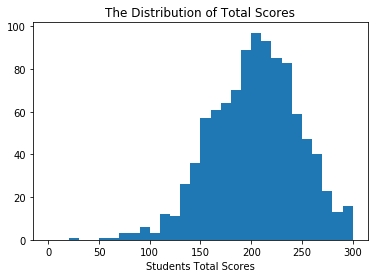

In [3]:
# Distribution of total score
# Create bins with step-size 4 and plotting
bins = np.arange(0, performance_data['total'].max()+10, 10)
plt.hist(data = performance_data, x = 'total', bins = bins)
plt.xlabel('Students Total Scores')
plt.title("The Distribution of Total Scores");


## Math Score Distribution

> Math score distribution is close to normal. Many students had a math score of between 60 and 80. 

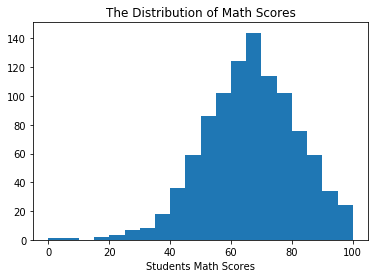

In [4]:
# Distribution of math score
# Create bins with step-size 5 and plotting
bins = np.arange(0, performance_data['math'].max()+5, 5)
plt.hist(data = performance_data, x = 'math', bins = bins)
plt.xlabel('Students Math Scores')
plt.title("The Distribution of Math Scores");

## The bilateral relationship between parental education and test preparation course completion

The students whose parents have an associate degree are the ones who mostly completed the preparation test. The students whose parents attended some college are the ones who mostly failed to complete the preparation test.


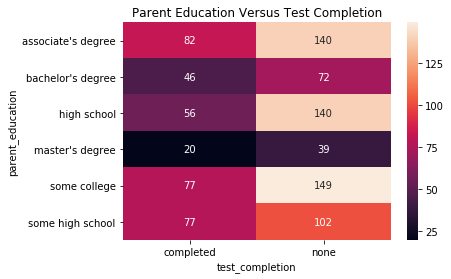

In [5]:
#parental education and text completion
ct_counts2 = performance_data.groupby(['parent_education', 'test_completion']).size()
ct_counts2 = ct_counts2.reset_index(name='count')
ct_counts2 = ct_counts2.pivot(index = 'parent_education', columns = 'test_completion', values = 'count')
sb.heatmap(ct_counts2, annot = True, fmt = 'd');
plt.title('Parent Education Versus Test Completion');

## Multilateral effect of categorical features against the bilateral relationship of total score and other scores.

It is interesting to note that lunch details, gender, parental education and completion of the test preparation course do not affect the relationship between the test scores. Therefore, it is good to conclude that based on this interactions, the overall score of a student can only be affected by the individual scores. The other features have very little or no effect on the relationship between the overall score and other tests.


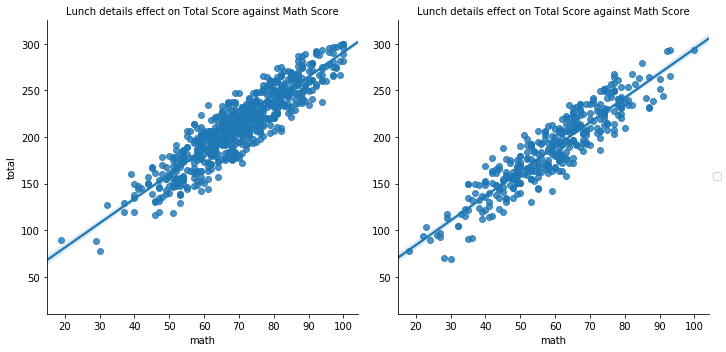

In [10]:
# Lunch details, math score and total score
g = sb.FacetGrid(data = performance_data, col = 'lunch', size = 5, aspect=1)
g.map(sb.regplot,'math', 'total')
g.set_titles("Lunch details effect on Total Score against Math Score")
g.add_legend();

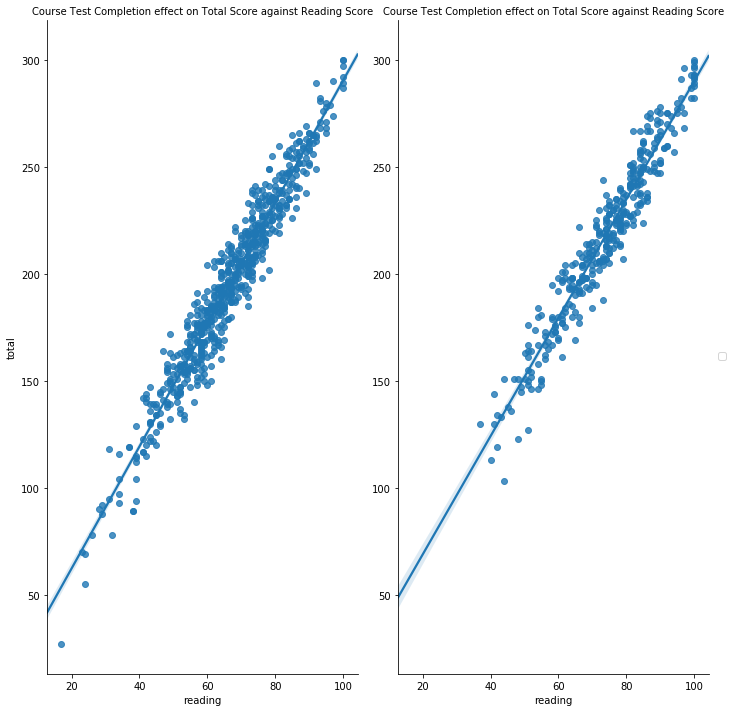

In [14]:
# Course Test Completion, writing score and total score
g = sb.FacetGrid(data = performance_data, col = 'test_completion', size = 10, aspect=0.5)
g.map(sb.regplot,'reading','total')
g.set_titles("Course Test Completion effect on Total Score against Reading Score")
g.add_legend();


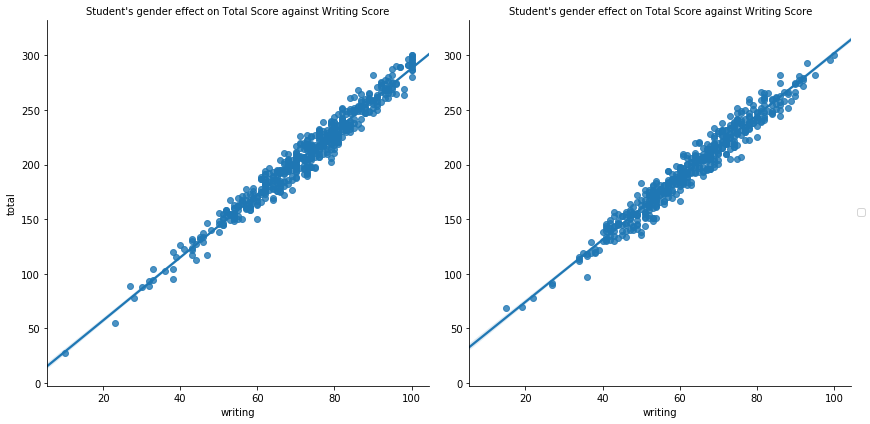

In [12]:
# Gender, math score and total score
g = sb.FacetGrid(data = performance_data, col = 'gender', size = 6)
g.map(sb.regplot,'writing','total')
g.set_titles("Student's gender effect on Total Score against Writing Score")
g.add_legend();

In [ ]:
!jupyter nbconvert "student_perfomance_exploration_part2.ipynb" --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook student_perfomance_exploration_part2.ipynb to slides
[NbConvertApp] Writing 539594 bytes to student_perfomance_exploration_part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/student_perfomance_exploration_part2.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/b